# 1

In [16]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import load_digits
from sklearn import model_selection

In [17]:
digits = load_digits()
print ( digits.keys() )

data = digits [ "data" ]
images = digits [ "images" ]
target = digits [ "target" ]
target_names = digits [ "target_names" ]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


(8, 8)


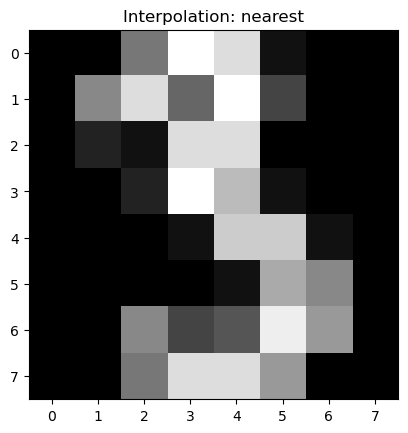

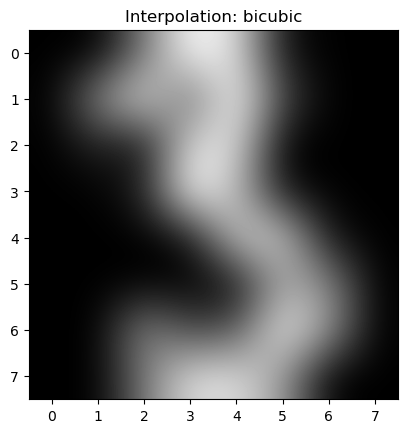

In [18]:
img_size = images[0].shape
print(img_size)

index_3 = np.where(target == 3)[0]

img = np.reshape(data[index_3][0], (8, 8))
assert 2 == len(img.shape)

plt.figure()
plt.gray()
plt.title('Interpolation: nearest')
plt.imshow( img , interpolation = "nearest" ) # also try interpolation =" bicubic "
plt.show()

plt.figure()
plt.gray()
plt.title('Interpolation: bicubic')
plt.imshow( img , interpolation = "bicubic" ) # also try interpolation =" bicubic "
plt.show()

- [x] <span style="color:green">Data is visualized and interpoalted correctly</span>

In [19]:
# Get indices of pcitures of a 9
index_9 = np.where(target == 9)[0]

# Concatenate both arrays of indices and mix them
both_indices = np.concatenate((index_9, index_3))
both_indices = np.sort(both_indices)

# Only select data with indices of 3s and 9s
data_3_9 = data[both_indices]
images = images[both_indices]
target = target[both_indices]


X_all = data_3_9
y_all = target
X_train , X_test , y_train , y_test =\
  model_selection.train_test_split( X_all, y_all ,
  test_size = 0.4 , random_state = 0)

- [x] <span style="color:green">Data filtering and split looks good.</span>


# 2.1

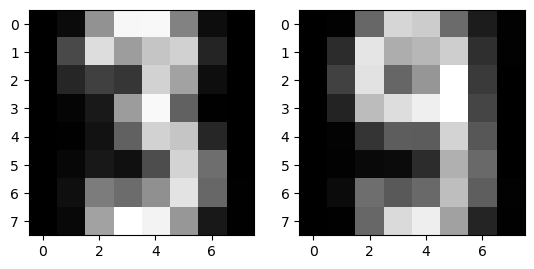

In [20]:
# Visualize the mean images for 3s and 9s
data_3, data_9 = data[index_3], data[index_9]
mean_img_3, mean_img_9 = np.reshape(np.mean(data_3, axis=0), (8,8)) , np.reshape(np.mean(data_9, axis=0), (8,8))

fig, axes = plt.subplots(1, 2)
axes[0].imshow(mean_img_3, interpolation = "nearest", cmap='gray')
axes[1].imshow(mean_img_9, interpolation = "nearest", cmap='gray')
plt.show()



To classify a 9, we use the pixels (3, 2), (2, 2) and (3, 5). For a 3, we use (0, 3), (0, 4) and (3, 4). Although, we have to admit that thsoe pixels are also represented in many 9s...

In [21]:
def features2d(x):
  f_3_2, f_3_5, f_0_3, f_0_4, f_3_4, f_2_2 = x[3, 2], x[3, 5], x[0, 3], x[0, 4], x[3, 4], x[2, 2]
  feature_9 = (f_3_2 + f_3_5 + f_2_2) / 3
  feature_3 = (f_0_3 + f_0_4 + f_3_4) / 3

  return [feature_9, feature_3]

- [x] <span style="color:green">Valid feature function.</span>


# 2.2

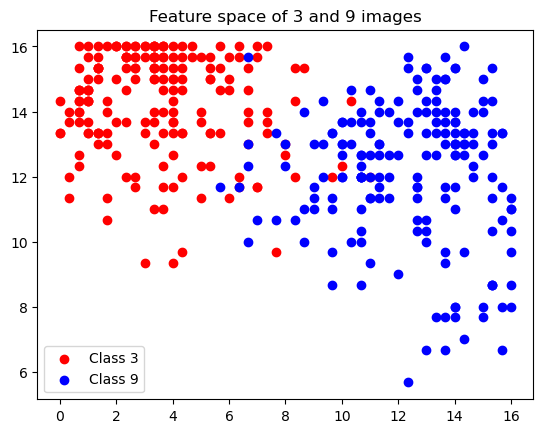

In [22]:
features_3 = []
for img in data_3:
  img = np.reshape(img, (8,8))
  current_feature = features2d(img)
  features_3.append(current_feature)

features_3 = np.array(features_3)

features_9 = []
for img in data_9:
  img = np.reshape(img, (8,8))
  current_feature = features2d(img)
  features_9.append(current_feature)

features_9 = np.array(features_9)

plt.scatter(features_3[:, 0], features_3[:, 1], c='r', label='Class 3')
plt.scatter(features_9[:, 0], features_9[:, 1], c='b', label='Class 9')

plt.legend()
plt.title('Feature space of 3 and 9 images')
plt.show()

We have some outliers and the seperation of the two classes is not clear. However, this is good enough for now. We can see the seperation of the two classes in the feature space.

- [x] <span style="color:green">Plot looks good.</span>


# 2.3

In [23]:
def nearest_mean(training_features, training_labels, test_features):

  # Seperate training data into arrays of 3 and 9
  indices_3 = np.where(training_labels == 3)[0]
  indices_9 = np.where(training_labels == 9)[0]
  training_features_3 = training_features[indices_3]
  training_features_9 = training_features[indices_9]

  # Find the mean of each feature
  mean_3 = np.mean(training_features_3, axis=0)
  mean_9 = np.mean(training_features_9, axis=0)

  # Calculate the distance of the test_features to both means and calssify the label
  labels = []

  for test_feature in test_features:
    distance_mean_3 = np.linalg.norm(mean_3 - test_feature)
    distance_mean_9 = np.linalg.norm(mean_9 - test_feature)

    if distance_mean_3 <= distance_mean_9:
      label = 3
    else:
      label = 9

    labels.append(label)

  return labels

In [24]:
def format_and_get_feature(data):
  'formats the 1d array to a 2d matrix and gets the features of the image'

  data_features = []
  for img in data:
    img = np.reshape(img, (8,8))
    current_feature = features2d(img)
    data_features.append(current_feature)

  return np.array(data_features)


test_features = format_and_get_feature(X_test)
training_features = format_and_get_feature(X_train)
training_labels = y_train
test_labels = y_test


def evaluate(training_features, training_labels, test_features, test_labels):
  predicted_labels = nearest_mean(training_features, training_labels, test_features)

  error = 0
  for index, element in enumerate(predicted_labels):
    if element != test_labels[index]:
      error += 1 # error contains Fp and FN

  total_error = error / len(test_labels)
  return round(total_error, 4)


# Get training error
error = evaluate(training_features, training_labels, training_features, training_labels)
print('training error:', error)

# Get test error
error = evaluate(training_features, training_labels, test_features, test_labels)
print('test error:', error)


training error: 0.0553
test error: 0.0479


Overall, the error is quit low which indicates that the classifier is good. Intersentingly, the error for the training data is higher than the error for the test data. This might be because the size of the training data is bigger than the size of the test data. Thus, it is more probable that the training data contains more outliers than the test data.

- [x] <span style="color:green">Neareast mean implemented correctly. Evaluation method is valid.</span>
- [ ] <span style="color:red">The labels where not transformer to -1 and 1.</span>


# 2.4

We adjust our function nearest_mean a little bit:

In [25]:
def nearest_mean_adjsuted(training_features, training_labels, feature):

  # Seperate training data into arrays of 3 and 9
  indices_3 = np.where(training_labels == 3)[0]
  indices_9 = np.where(training_labels == 9)[0]
  training_features_3 = training_features[indices_3]
  training_features_9 = training_features[indices_9]

  # Find the mean of each feature
  mean_3 = np.mean(training_features_3, axis=0)
  mean_9 = np.mean(training_features_9, axis=0)

  distance_mean_3 = np.linalg.norm(mean_3 - feature)
  distance_mean_9 = np.linalg.norm(mean_9 - feature)

  if distance_mean_3 <= distance_mean_9:
    label = 1
  else:
    label = 0

  return label, mean_3, mean_9

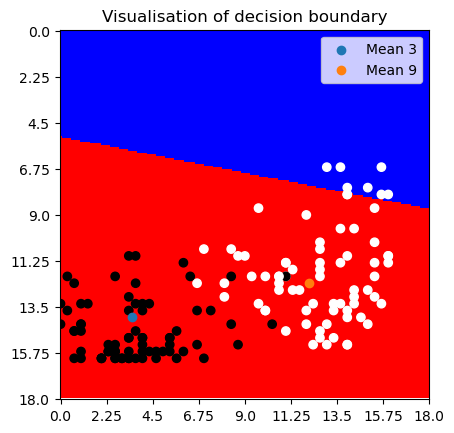

In [26]:
from matplotlib.colors import ListedColormap

matrix = np.zeros((200, 200))
f_1_values = np.linspace(0, 18, 200)
f_2_values = np.linspace(0, 18, 200)

for row_index in np.arange(0, 200):
  for column_index in np.arange(0, 200):
    f_1 = f_1_values[row_index]
    f_2 = f_2_values[column_index]

    label, mean_3, mean_9 = nearest_mean_adjsuted(training_features, training_labels, np.array([f_1, f_2]))
    matrix[row_index, column_index] = label

cmap = ListedColormap(['red', 'blue'])
plt.imshow(matrix, cmap=cmap, interpolation='nearest', vmin=0, vmax=1)

test_features = format_and_get_feature(X_test)
test_labels = y_test

scatter = plt.scatter([(i[0] / 18 * 200) for i in test_features],
                      [(i[1] / 18 * 200) for i in test_features],
                      c=test_labels)

mean3_scatter = plt.scatter(mean_3[0] / 18 * 200, mean_3[1] / 18 * 200, label='Mean 3')
mean9_scatter = plt.scatter(mean_9[0] / 18 * 200, mean_9[1] / 18 * 200, label='Mean 9')

plt.xticks(np.linspace(0, 200, 9), np.linspace(0, 18, 9))
plt.yticks(np.linspace(0, 200, 9), np.linspace(0, 18, 9))
plt.title('Visualisation of decision boundary')
plt.legend()
plt.show()

We have plotted the test data in the featuer space for class 3 (black) and class 9 (white). However, the decision boundary is not steep enough. The blue color maps the features to class 9 and the red color to class 3. Thus, our function for the feature calculation might not be good enough. However, we have previously calcualted the test error which was quite low. Thus, we most likely did something wrong in the process of plotting.

- [x] <span style="color:green">Code looks good to me, but I cannot tell whether the plot is incorrect or the algorithm.</span>
- [ ] <span style="color:red">Labels are still not transformed to -1 and 1 but rather 0 and 1.</span>


# 3.1

In [27]:
def fit_lds(training_features, training_labels):
  assert training_labels.shape[0] == training_features.shape[0]

  features_3 =  []
  features_9 = []

  for feature_row in range(training_features.shape[0]):
    if training_labels[feature_row] == 3:
      features_3.append(training_features[feature_row, :])
    else:
      features_9.append(training_features[feature_row, :])

  mu_3 = np.mean(np.array(features_3), axis=0)
  mu_9 = np.mean(np.array(features_9), axis=0)

  covmat = np.zeros((training_features.shape[1], training_features.shape[1]))

  for i in features_3:
    covmat += np.outer((i - mu_3).T, (i - mu_3))

  for i in features_9:
    covmat += np.outer((i - mu_9).T, (i - mu_9))

  covmat /= len(training_labels)

  N = len(features_3)
  p3 = np.sum(training_labels == 3) / N
  p9 = np.sum(training_labels == 9) / N
  p = np.array([p3, p9])

  mu = np.vstack((mu_3, mu_9))

  return mu, covmat, p

In [28]:
params = fit_lds(X_train, y_train)
print(f'mu {params[0]}, \ncovmat {params[1]}, \np {params[2]}')

mu [[0.00000000e+00 6.66666667e-01 8.39639640e+00 1.41531532e+01
  1.39009009e+01 7.10810811e+00 8.10810811e-01 9.00900901e-03
  0.00000000e+00 3.76576577e+00 1.22162162e+01 9.07207207e+00
  1.14504505e+01 1.15675676e+01 2.10810811e+00 9.00900901e-03
  0.00000000e+00 1.60360360e+00 3.50450450e+00 3.45045045e+00
  1.17027027e+01 9.00000000e+00 9.00900901e-01 0.00000000e+00
  0.00000000e+00 1.44144144e-01 1.45045045e+00 8.70270270e+00
  1.39009009e+01 5.58558559e+00 6.30630631e-02 0.00000000e+00
  0.00000000e+00 5.40540541e-02 1.36036036e+00 5.95495495e+00
  1.20450450e+01 1.10630631e+01 1.98198198e+00 0.00000000e+00
  0.00000000e+00 5.67567568e-01 1.59459459e+00 1.20720721e+00
  4.77477477e+00 1.20810811e+01 5.99099099e+00 0.00000000e+00
  0.00000000e+00 9.18918919e-01 7.27927928e+00 6.22522523e+00
  8.49549550e+00 1.32162162e+01 5.52252252e+00 9.00900901e-03
  0.00000000e+00 5.13513514e-01 9.21621622e+00 1.46936937e+01
  1.36846847e+01 8.30630631e+00 1.00900901e+00 9.00900901e-03]
 [0.

# 3.2

In [29]:
def predict_lda(mu, covmat, p, test_features):
  N = mu.shape[1]
  covmat_inverse = np.linalg.inv(covmat)
  mu_diff = mu[1] - mu[0]
  beta = np.dot(covmat_inverse, mu_diff.T)
  b = -0.5 * (mu[1] - mu[0]) * beta + np.log(N[1] / N[0])

  test_labels = []
  for i in range(len(test_features.shape[0])):
    if i * beta + b > 0:
      test_labels.append(3) # check if the classes are right
    else:
      test_labels.append(9)


In [30]:
# Training data
predict_lda(*params, test_features=y_train)

# Test data
predict_lda(*params, test_features=y_test)


LinAlgError: Singular matrix

- [ ] <span style="color:red">Predict lda and fit lda not working. Labels are still 3 and 9.</span>
- [ ] <span style="color:red">Visualization and PCA clusters not implemented.</span>
- [ ] <span style="color:red">So entirely Task 3 is not implemented.</span>


# 3.3

# 4

In [31]:
def partial_derivative_loss_beta(beta, b, X, y, lamda):
    N = len(y)
    partial_sum = np.zeros_like(beta)
    for i in range(N):
        if y[i] * (np.dot(X[i], beta) + b) < 1:
            partial_sum += -y[i] * X[i]
    return beta + (lamda / N) * partial_sum


def partial_derivative_loss_b(beta, b, X, y, lamda):
    N = len(y)
    partial_sum = np.zeros_like(beta)
    for i in range(N):
        if y[i] * (np.dot(X[i], beta) + b) < 1:
            partial_sum += -y[i]
    return (lamda / N) * partial_sum


def loss_function(beta, b, X, y, lambda_):
    N = len(y)
    beta = beta.reshape(-1, 1)
    hinge_loss = np.maximum(0, 1 - y * (X.dot(beta) + b))
    return 0.5 * np.dot(beta, beta) + lambda_ / N * np.sum(hinge_loss)


def plot_loss(loss_list):
  plt.plot(np.linspace(0, len(loss_list)), loss_list)
  plt.xlabel('Iterations')
  plt.ylabel('loss')
  plt.show()

In [32]:
def fit_svm(training_features, training_labels, lambda_, learning_rate, max_steps, tolerance):

    # Initialize parameters
    beta = np.random.normal(size=training_features.shape[1])
    b = 0
    N = training_features.shape[0]
    loss = 0
    loss_list = []

    # Gradient descent optimization
    for step in range(max_steps):

        # Compute gradients
        d_beta = partial_derivative_loss_beta(beta, b, training_features, training_labels, lambda_)
        d_b = partial_derivative_loss_b(beta, b, training_features, training_labels, lambda_)

        # Update parameters
        beta -= learning_rate * d_beta
        b -= learning_rate * d_b

        # Calculate loss
        loss += loss_function(beta, b, training_features, training_labels, lambda_)
        loss_list.append(loss)

        # training rate scheduler
        if len(loss_list) > 10 and abs(loss_list[-1] - loss_list[-2]) > tolerance:
          learning_rate /= 10

    return beta, b, loss_list


In [33]:
tolerance = 0.05
max_steps = 100
learning_rate = 0.1
lambda_ = 0.3
training_features = format_and_get_feature(X_train)

beta, b, loss_list = fit_svm(training_features, training_labels, lambda_, learning_rate, max_steps, tolerance)
plot_loss(loss_list)

ValueError: operands could not be broadcast together with shapes (217,) (217,2) 

In [34]:
def predict_svm(X, beta, b):
    predictions = np.sign(np.dot(X, beta) + b)
    return predictions

In [35]:
# plot loss

plot_loss(loss_list)

NameError: name 'loss_list' is not defined

In [36]:
# Visualize decision boundary

def boundary(x, beta, b):
  return x*beta + b

test_features = format_and_get_feature(X_test)
test_labels = y_test
x = np.linspace(0,18)
plt.plot(x, boundary(x, beta, b))
plt.title('SVM decision boundary in feature space')
plt.scatter([i[0] for i in test_features],
                      [i[1] for i in test_features],
                      c=test_labels)

NameError: name 'beta' is not defined

In [ ]:
# Cross validation

lambda_guesses = [0, 0.1, 0.5, 0.8, 1, 2, 3]
results = []
for lambda_ in lambda_guesses:
  params = fit_svm(training_features, training_features, lambda_, learning_rate, max_steps, tolerance)
  results.append(params)

last_losses = [i[2][-1] for i in results]
lowest_loss = min(last_losses)
index = last_losses.index(lowest_loss)

best_lambda = lambda_guesses[index]
best_beta = results[index][0]
best_b = results[index][1]
print(f'lambda {best_lambda}, beta {best_beta}, b{best_b}')

In [ ]:
# sklearn

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(training_features, training_labels)
y_pred = svm_model.predict(test_features)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9657534246575342


We got a pretty high accuracy. This algorithm performed better than ours did.

- [ ] <span style="color:red">
That is the accuracy from the sklearn implementation not your own model which is not working.</span>


Grading:

Task 1: complete

Task 2: looks good but visualization is definetly incorrect + not using the label transformation to -1 and 1

Task 3: nothing working

Task 4: nothing working
